<a href="https://colab.research.google.com/github/KabichNeu/StockMarketPrediction/blob/master/nabildatamining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
pwd

'/content/gdrive/My Drive/Kaggle'

In [ ]:
!ls


 kaggle.json  'Nepali_Stock_Market _Data__2012-2020'   OHLC.csv


In [ ]:
import pandas as pd
import numpy as np
from scipy import sparse
raw_data = pd.read_csv('OHLC.csv')
raw_data.head(200)

,S.no,Symbol,Date,Open,High,Low,Close,Vol
0,0,ACEDBL,2012-01-01.csv,114.0,113.0,112.0,113.0,"1,962"
1,1,ACEDPO,2012-01-01.csv,188.0,114.0,114.0,114.0,"10,000"
2,2,ADBL,2012-01-01.csv,115.0,115.0,113.0,114.0,"1,111"
3,3,AHPC,2012-01-01.csv,319.0,319.0,312.0,312.0,377
4,4,ALDBL,2012-01-01.csv,102.0,101.0,101.0,101.0,30
...,...,...,...,...,...,...,...,...
195,44,NCM,2012-01-03.csv,179.0,181.0,170.0,170.0,"2,515"
196,45,NDEP,2012-01-03.csv,85.0,87.0,85.0,85.0,512
197,46,NHPC,2012-01-03.csv,50.0,51.0,50.0,51.0,"3,110"
198,47,NIB,2012-01-03.csv,407.0,424.0,408.0,408.0,"1,439"


In [ ]:
stock_data = raw_data.drop(['S.no'],axis=1)


In [ ]:
stock_data

,Symbol,Date,Open,High,Low,Close,Vol
0,ACEDBL,2012-01-01.csv,114.0,113.0,112.0,113.0,"1,962"
1,ACEDPO,2012-01-01.csv,188.0,114.0,114.0,114.0,"10,000"
2,ADBL,2012-01-01.csv,115.0,115.0,113.0,114.0,"1,111"
3,AHPC,2012-01-01.csv,319.0,319.0,312.0,312.0,377
4,ALDBL,2012-01-01.csv,102.0,101.0,101.0,101.0,30
...,...,...,...,...,...,...,...
250896,TRH,2020-03-22.csv,206.0,206.0,202.0,206.0,"1,575"
250897,UIC,2020-03-22.csv,313.0,313.0,301.0,307.0,636
250898,UMHL,2020-03-22.csv,100.0,100.0,100.0,100.0,519
250899,UPCL,2020-03-22.csv,73.0,73.0,73.0,73.0,10


In [ ]:
stock_data.set_index("Symbol", inplace = True)
nabil_data = stock_data.loc['NABIL']

In [ ]:
nabil_data

,Date,Open,High,Low,Close,Vol
Symbol,,,,,,
NABIL,2012-01-01.csv,873.0,879.0,851.0,879.0,799
NABIL,2012-01-02.csv,879.0,913.0,882.0,900.0,"1,002"
NABIL,2012-01-03.csv,900.0,916.0,892.0,892.0,"2,653"
NABIL,2012-01-04.csv,892.0,875.0,842.0,865.0,490
NABIL,2012-01-05.csv,865.0,875.0,858.0,858.0,121
...,...,...,...,...,...,...
NABIL,2020-03-16.csv,741.0,764.0,723.0,750.0,"55,501"
NABIL,2020-03-17.csv,765.0,765.0,721.0,731.0,"46,620"
NABIL,2020-03-18.csv,731.0,739.0,700.0,715.0,"43,913"


In [ ]:
nabil_data['Date'].dtype

dtype('O')

In [ ]:
nabil_data['Date'].replace('.csv','', regex=True, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
nabil_data['Date']

Symbol
NABIL    2012-01-01
NABIL    2012-01-02
NABIL    2012-01-03
NABIL    2012-01-04
NABIL    2012-01-05
            ...    
NABIL    2020-03-16
NABIL    2020-03-17
NABIL    2020-03-18
NABIL    2020-03-19
NABIL    2020-03-22
Name: Date, Length: 1910, dtype: object

In [ ]:
import datetime
nabil_data['Date'] = pd.to_datetime(nabil_data['Date'],infer_datetime_format= True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
nabil_data

,Date,Open,High,Low,Close,Vol
Symbol,,,,,,
NABIL,2012-01-01,873.0,879.0,851.0,879.0,799
NABIL,2012-01-02,879.0,913.0,882.0,900.0,"1,002"
NABIL,2012-01-03,900.0,916.0,892.0,892.0,"2,653"
NABIL,2012-01-04,892.0,875.0,842.0,865.0,490
NABIL,2012-01-05,865.0,875.0,858.0,858.0,121
...,...,...,...,...,...,...
NABIL,2020-03-16,741.0,764.0,723.0,750.0,"55,501"
NABIL,2020-03-17,765.0,765.0,721.0,731.0,"46,620"
NABIL,2020-03-18,731.0,739.0,700.0,715.0,"43,913"


In [ ]:
nabil_data['Date'].dtype

dtype('<M8[ns]')

In [ ]:
nabil_data = nabil_data.reset_index()

In [ ]:
nabil_data

,Symbol,Date,Open,High,Low,Close,Vol
0,NABIL,2012-01-01,873.0,879.0,851.0,879.0,799
1,NABIL,2012-01-02,879.0,913.0,882.0,900.0,"1,002"
2,NABIL,2012-01-03,900.0,916.0,892.0,892.0,"2,653"
3,NABIL,2012-01-04,892.0,875.0,842.0,865.0,490
4,NABIL,2012-01-05,865.0,875.0,858.0,858.0,121
...,...,...,...,...,...,...,...
1905,NABIL,2020-03-16,741.0,764.0,723.0,750.0,"55,501"
1906,NABIL,2020-03-17,765.0,765.0,721.0,731.0,"46,620"
1907,NABIL,2020-03-18,731.0,739.0,700.0,715.0,"43,913"
1908,NABIL,2020-03-19,701.0,740.0,690.0,730.0,"55,806"


In [ ]:
nabil_data = nabil_data.drop(['Symbol'], axis = 1)

In [ ]:
nabil_data

,Date,Open,High,Low,Close,Vol
0,2012-01-01,873.0,879.0,851.0,879.0,799
1,2012-01-02,879.0,913.0,882.0,900.0,"1,002"
2,2012-01-03,900.0,916.0,892.0,892.0,"2,653"
3,2012-01-04,892.0,875.0,842.0,865.0,490
4,2012-01-05,865.0,875.0,858.0,858.0,121
...,...,...,...,...,...,...
1905,2020-03-16,741.0,764.0,723.0,750.0,"55,501"
1906,2020-03-17,765.0,765.0,721.0,731.0,"46,620"
1907,2020-03-18,731.0,739.0,700.0,715.0,"43,913"
1908,2020-03-19,701.0,740.0,690.0,730.0,"55,806"


In [ ]:
nabil_data.describe(include = 'all')

,Date,Open,High,Low,Close,Vol
count,1910,1910.000000,1910.000000,1910.000000,1910.000000,1910
unique,1901,NaN,NaN,NaN,NaN,1757
top,2015-06-08 00:00:00,NaN,NaN,NaN,NaN,"1,982"
freq,3,NaN,NaN,NaN,NaN,3
first,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2020-03-22 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,1538.958115,1555.184817,1522.249215,1539.656021,NaN
std,NaN,559.777683,568.388348,554.175755,561.606581,NaN
min,NaN,662.000000,669.000000,660.000000,667.000000,NaN
25%,NaN,955.000000,960.000000,944.000000,952.250000,NaN


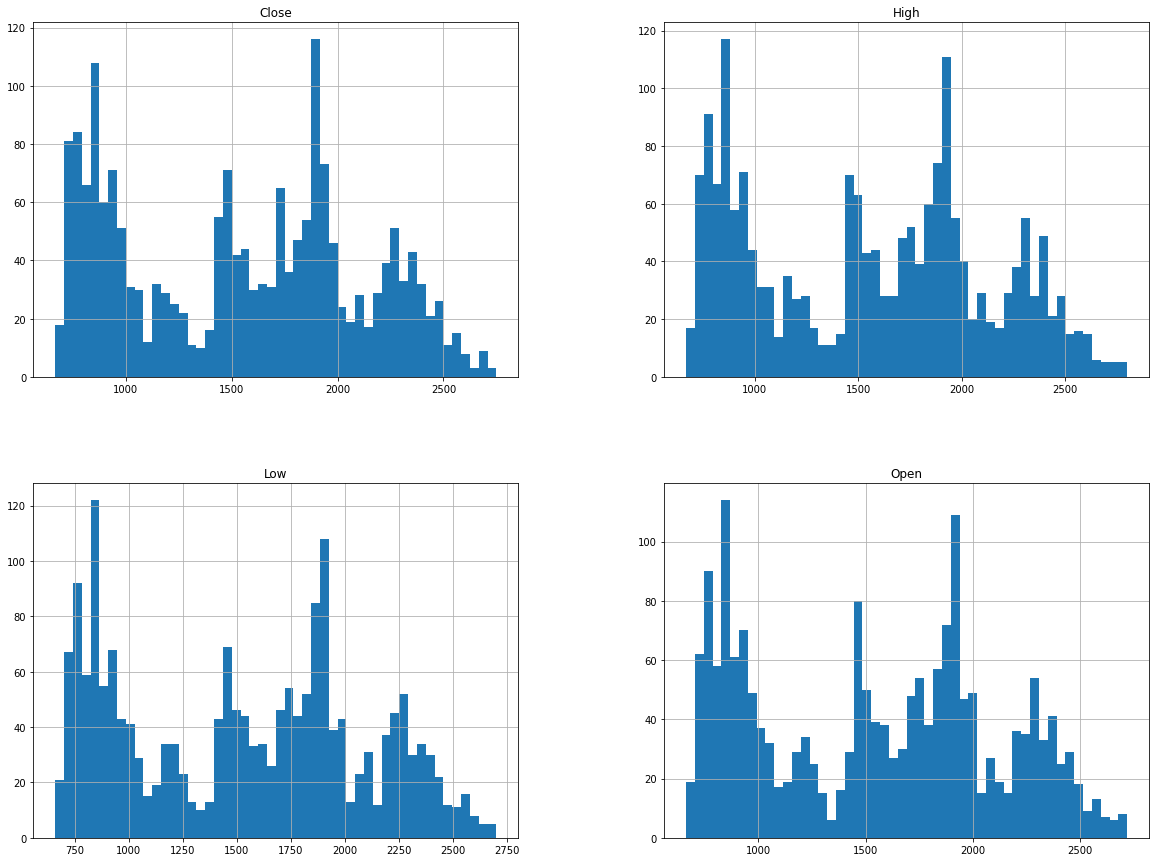

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
nabil_data.hist(bins = 50, figsize = (20,15))
plt.show()

In [ ]:
nabil_data.to_csv(r'/content/gdrive/My Drive/Kaggle/nabildata.csv', index = False)


In [ ]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!ls

 kaggle.json   nabildata.csv  'Nepali_Stock_Market _Data__2012-2020'   OHLC.csv
